In [133]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [134]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1727,1728,15734491,Lombardo,676,Spain,Female,36,4,0.0,2,1,1,3173.31,0
7505,7506,15660528,Niu,659,Spain,Male,27,4,0.0,2,1,0,99341.87,0
8750,8751,15644849,Zikoranachidimma,655,France,Female,32,2,0.0,1,1,1,71047.51,0
4691,4692,15758050,Madukwe,622,Spain,Male,37,4,0.0,2,1,0,4459.50,0
345,346,15763859,Brown,840,France,Female,43,7,0.0,2,1,0,90908.95,0


In [135]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [136]:
columns_to_drop=['CustomerId','RowNumber','Surname']
df.drop(columns=columns_to_drop,inplace=True)

In [137]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [138]:
#The dataset has no null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [139]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [140]:
print_unique_col_values(df)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [141]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [142]:
df['Gender'].unique()

array([1, 0])

In [143]:
#One Hot Encoding
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [144]:
#df1=df1.astype(int)
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7628,850,0,28,8,99986.98,1,1,0,196582.55,0,True,False,False
5613,604,1,32,7,127849.38,1,1,0,15798.70,0,True,False,False
445,748,1,26,1,77780.29,1,0,1,183049.41,0,True,False,False
2854,748,0,33,1,142645.43,1,0,0,69132.66,0,True,False,False
8622,706,0,36,9,58571.18,2,1,0,40774.01,0,False,True,False


In [145]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [146]:
#Scaling
cols_to_scale=['Balance','Tenure','EstimatedSalary','CreditScore','Age','NumOfProducts']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [147]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [148]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5168,0.388,0,0.162162,0.8,0.578887,0.000000,1,1,0.403365,0,False,False,True
4225,0.596,0,0.243243,0.8,0.585670,0.333333,1,1,0.650211,0,False,False,True
4096,0.940,0,0.216216,1.0,0.387442,0.000000,1,1,0.297737,0,False,False,True
6591,0.816,1,0.202703,0.7,0.000000,0.000000,1,0,0.940814,0,True,False,False
4912,0.796,0,0.567568,0.0,0.607162,0.000000,1,0,0.633719,1,True,False,False


In [120]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [121]:
X=df1.drop('Exited',axis='columns')
y=df1['Exited']

In [122]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [123]:
X_train.shape

(8000, 12)

In [124]:
X_test.shape

(2000, 12)

In [125]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,False,False,True
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,True,False,False
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,True,False,False
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,True,False,False
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.616,1,0.175676,0.3,0.530108,0.000000,0,1,0.731708,False,True,False
9917,0.570,0,0.472973,0.8,0.466347,0.000000,0,1,0.618234,False,True,False
4079,0.466,1,0.175676,0.4,0.633639,0.000000,1,0,0.062643,True,False,False
2254,0.658,0,0.243243,0.6,0.588819,0.000000,0,1,0.862531,True,False,False


In [126]:
len(X_train.columns)

12

In [127]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [82]:
X_train.dtypes

CreditScore          float64
Gender                 int64
Age                    int64
Tenure               float64
Balance              float32
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float32
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [153]:
import tensorflow as tf
from tensorflow import keras

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)

model= keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 304us/step - loss: 0.5329 - accuracy: 0.7631
Epoch 2/100
250/250 [==============================] - 0s 277us/step - loss: 0.4794 - accuracy: 0.7959
Epoch 3/100
250/250 [==============================] - 0s 277us/step - loss: 0.4630 - accuracy: 0.7996
Epoch 4/100
250/250 [==============================] - 0s 277us/step - loss: 0.4523 - accuracy: 0.8056
Epoch 5/100
250/250 [==============================] - 0s 279us/step - loss: 0.4435 - accuracy: 0.8089
Epoch 6/100
250/250 [==============================] - 0s 292us/step - loss: 0.4361 - accuracy: 0.8121
Epoch 7/100
250/250 [==============================] - 0s 292us/step - loss: 0.4297 - accuracy: 0.8139
Epoch 8/100
250/250 [==============================] - 0s 319us/step - loss: 0.4240 - accuracy: 0.8175
Epoch 9/100
250/250 [==============================] - 0s 290us/step - loss: 0.4193 - accuracy: 0.8215
Epoch 10/100
250/250 [==============================] - 0s 283us/step - l

250/250 [==============================] - 0s 282us/step - loss: 0.3366 - accuracy: 0.8606
Epoch 80/100
250/250 [==============================] - 0s 279us/step - loss: 0.3364 - accuracy: 0.8615
Epoch 81/100
250/250 [==============================] - 0s 278us/step - loss: 0.3364 - accuracy: 0.8627
Epoch 82/100
250/250 [==============================] - 0s 279us/step - loss: 0.3361 - accuracy: 0.8625
Epoch 83/100
250/250 [==============================] - 0s 274us/step - loss: 0.3362 - accuracy: 0.8621
Epoch 84/100
250/250 [==============================] - 0s 275us/step - loss: 0.3360 - accuracy: 0.8624
Epoch 85/100
250/250 [==============================] - 0s 273us/step - loss: 0.3361 - accuracy: 0.8619
Epoch 86/100
250/250 [==============================] - 0s 273us/step - loss: 0.3363 - accuracy: 0.8614
Epoch 87/100
250/250 [==============================] - 0s 277us/step - loss: 0.3361 - accuracy: 0.8618
Epoch 88/100
250/250 [==============================] - 0s 273us/step - loss:

In [155]:
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int64)
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 333us/step - loss: 0.3562 - accuracy: 0.8490


[0.3562159240245819, 0.8489999771118164]

In [161]:
yp = model.predict(X_test)
yp[:10]

63/63 [==============================] - 0s 332us/step


array([[0.03793091],
       [0.07619853],
       [0.06873282],
       [0.08701313],
       [0.07096151],
       [0.20770107],
       [0.01118459],
       [0.35729107],
       [0.01661905],
       [0.9447234 ]], dtype=float32)

In [162]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [163]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [164]:
y_test[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])>

In [165]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.69      0.46      0.55       405

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

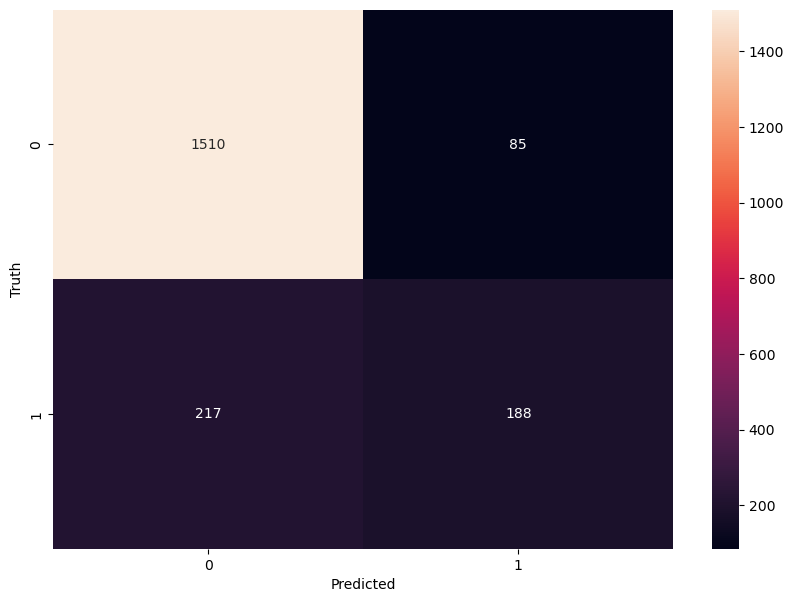

In [166]:
import seaborn as sn
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [167]:
y_test.shape

TensorShape([2000])

In [169]:
#Accuracy
round((1510+188)/(1510+188+85+217),2)

0.85

In [170]:
#Precision for 0 class
round(1510/(1510+217),2)

0.87

In [172]:
#Precision for class 1
round(188/(188+85),2)

0.69

In [171]:
#Recall for 1 class
round(188/(188+217),2)

0.46

In [173]:
#Recall for class 0
round(1510/(1510+85),2)

0.95